# Strava Analysis
Explore all my running and social media running through Strava Data

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as date
import os
import sys
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
import statsmodels.api as sm

Read in my data sources here. IF you already ran my package to get this data, you will find it in your newly created data folder.  
Replace each df with the appropriatley named file in your data folder:  
1. combined_activities.csv
2. historic_activities_clean.csv
3. new_activities_clean.csv)

In [67]:

df_combo = pd.read_csv(r'/Users/anna/Google Drive/Projects/strava_analysis/strava_analysis/data/combined_activities.csv')
df_historic = pd.read_csv(r'/Users/anna/Google Drive/Projects/strava_analysis/strava_analysis/data/historic_activities_clean.csv')
df_api = pd.read_csv(r'/Users/anna/Google Drive/Projects/strava_analysis/strava_analysis/data/new_activities_clean.csv')

# Can we predict Kudos???
We all give them. We all get thme (hopefully). Can we predict them?? This method below tests to see if there are any factors of the data from Strava's API that are useful in predicting Kudos. I implemted a Multiple Linear Regression Model to the R^2 of each feature. Let's find out!

In [64]:
def stats_regression(file_path):
  
    df = file_path


    #Create new dataframe with only columns I care about
    cols = ['kudos_count', 'total_photo_count', 'type', 'distance', 'moving_time',   
            'average_speed', 'max_speed','total_elevation_gain',
            'activity_id','comment_count','average_heartrate','average_temp'
        ]
    df = df[cols]
    
    # define the features I wanna test to see if they correlate with kudos given
    features = ['total_photo_count', 'distance','average_speed']
    # what we want to predict
    target = 'kudos_count'
    
    # shapes them correctly
    x = df[features].values.reshape(-1, len(features))
    y = df[target].values
    
    # needed for this partiulcar module 
    x = sm.add_constant(x)
    
    # makes the model
    model = sm.OLS(y, x)
    results = model.fit()
    
    # shows the beautiful table below
    print(results.summary())
    
    print('coefficient of determination:', results.rsquared)

    print('adjusted coefficient of determination:', results.rsquared_adj)

    print('regression coefficients:', results.params)

    #print('predicted response:', results.fittedvalues, sep='\n')



    #print('predicted response:', results.predict(x), sep='\n')
    
    
stats_regression(df_api)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     16.98
Date:                Fri, 28 May 2021   Prob (F-statistic):           7.61e-10
Time:                        13:47:07   Log-Likelihood:                -506.36
No. Observations:                 200   AIC:                             1021.
Df Residuals:                     196   BIC:                             1034.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3792      0.896     13.819      0.0

# Intepretation...
It's not looking great. The R-squared is only .20 (we want this to be close to 1). Also..the p-values are disturbingly low, meaning we reject the null hypothesis. In English, this means they are not good predictors of kudos. But hey, we gave it our best effort! So what do we know..that stastically speaking, the amount of photos I post, distance I run, and speed at which I run do not predict very well how many kudos that post will get. *Sad*

In [61]:
def another_regression(file_path):
    # reads in activities df
    df = file_path#pd.read_csv(file_path)


    #Create new dataframe with only columns I care about
    cols = ['kudos_count', 'total_photo_count', 'type', 'distance', 'moving_time',   
            'average_speed', 'max_speed','total_elevation_gain',
            'activity_id','comment_count','average_heartrate','average_temp'
        ]
    df = df[cols]

    features = ['total_photo_count', 'distance','average_speed']
    features = ['total_photo_count']
    target = 'kudos_count'
    x = df[features].values.reshape(-1, len(features))
    y = df[target].values
    
    # forming model
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)

    print('slope:', model.coef_)
    new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
    print('intercept:', new_model.intercept_)

    print('slope:', new_model.coef_)
    
    # predict
    y_pred = model.predict(x)
    print('predicted response:', y_pred, sep='\n')
    
    x_new = np.arange(5).reshape((-1, 1))
    #print(x_new)
    y_new = model.predict(x_new)
    #print(y_new)




another_regression(df_api)

coefficient of determination: 0.10445217954215102
intercept: 12.70561193579673
slope: [0.35601197]
intercept: [12.70561194]
slope: [[0.35601197]]
predicted response:
[13.77364785 14.12965982 15.19769573 13.77364785 14.12965982 15.90971968
 14.12965982 14.84168376 13.41763588 14.48567179 14.12965982 13.06162391
 14.12965982 14.48567179 13.06162391 13.06162391 13.41763588 12.70561194
 13.06162391 13.06162391 13.77364785 13.41763588 13.41763588 14.12965982
 14.84168376 13.77364785 17.68977953 15.19769573 15.55370771 17.33376756
 16.62174362 14.12965982 13.41763588 14.84168376 14.48567179 15.55370771
 15.19769573 14.84168376 13.41763588 13.77364785 14.84168376 16.26573165
 13.77364785 15.55370771 17.33376756 14.48567179 14.48567179 15.55370771
 15.19769573 15.90971968 14.12965982 16.62174362 13.41763588 15.19769573
 14.84168376 15.55370771 14.12965982 12.70561194 13.06162391 13.06162391
 12.70561194 12.70561194 13.06162391 16.62174362 14.12965982 16.26573165
 12.70561194 14.48567179 15.197

[ 0.22507429  0.65689317 -0.3593275 ]
12.3792031451068
0.2062979051761782
[2902.11953161]
Feature 0: 25.926724
Feature 1: 42.547754
Feature 2: 0.725896


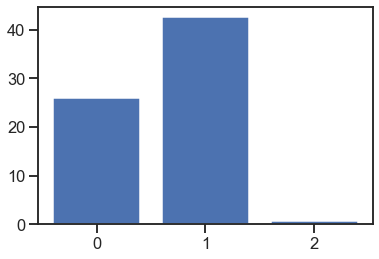

In [35]:
def feature_seclection_regression(file_path):
    # reads in activities df
    df = file_path#pd.read_csv(file_path)


    #Create new dataframe with only columns I care about
    cols = ['kudos_count', 'total_photo_count', 'type', 'distance', 'moving_time',   
            'average_speed', 'max_speed','total_elevation_gain',
            'activity_id','comment_count','average_heartrate','average_temp'
        ]
    df = df[cols]

    features = ['total_photo_count', 'distance','average_speed']
    target = 'kudos_count'
   
    # regr = linear_model.LinearRegression()
    # regr.fit(X, y)

    # predict_kudos = regr.predict([[3, 4400,3.52]])

    # print(predict_kudos)
    ################################################ Train #############################################
    X = df[features].values.reshape(-1, len(features))
    y = df[target].values

    ols = linear_model.LinearRegression()
    model = ols.fit(X, y)
    print(model.coef_)
    print(model.intercept_)
    print(model.score(X, y))

    x_pred = np.array([3, 4400,3.52])
    x_pred = x_pred.reshape(-1, len(features))

    print(model.predict(x_pred))
    
    
    ###### other
    # feature selection
    def select_features(X_train, y_train, X_test):
        # configure to select all features
        fs = SelectKBest(score_func=f_regression, k='all')
        # learn relationship from training data
        fs.fit(X_train, y_train)
        # transform train input data
        X_train_fs = fs.transform(X_train)
        # transform test input data
        X_test_fs = fs.transform(X_test)
        return X_train_fs, X_test_fs, fs
    # split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    # what are scores for the features
    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    pyplot.show()

feature_seclection_regression(df_api)

In [11]:

def speed_vs_distance(file_path):
    """[Investigates to see if there is a relationship between 
        how far I run and my average speed]
    """
    
    # reads in activities df
    df = file_path#pd.read_csv(file_path)


    #Create new dataframe with only columns I care about
    cols = ['name', 'activity_id', 'type', 'distance', 'moving_time',   
            'average_speed', 'max_speed','total_elevation_gain',
            'activity_date'
        ]
    df = df[cols]


    # change avg speed
    #df.loc[df["average_speed"] == 0,'average_speed'] = (df["distance"]  / df["moving_time"])*1000

    # select only runs (although tbh, it's already nearly just that)
    runs = df.loc[df['type'] == 'Run']

    # create graph to investigate avg speed vs distance
    sns.set(style="ticks", context="talk")
    sns.regplot(x='distance', y = 'average_speed', data = runs).set_title("Average Speed vs Distance")
    # saves image
    #general_utils.save_image(plt,"avg_speed_vs_distance")
    plt.show()

    # create graph to investigate max speed vs distance
    sns.scatterplot(x='distance', y = 'max_speed', data = runs).set_title("Max Speed vs Distance")
    # saves image
    plt.show()


def max_speed_over_time(file_path):
    """[Plots the maxed speed over time.]
    """
    # reads in activities df
    df = file_path#pd.read_csv(file_path)


    #Create new dataframe with only columns I care about
    cols = ['name', 'upload_id', 'type', 'distance', 'moving_time',   
            'average_speed', 'max_speed','total_elevation_gain',
            'activity_date'
        ]
    df = df[cols]

    # change avg speed
    #df.loc[df["average_speed"] == 0,'average_speed'] = (df["distance"]  / df["moving_time"])*1000
 
    # select only runs (although tbh, it's already nearly just that)
    runs = df.loc[df['type'] == 'Run']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = np.asarray(runs.activity_date)
    y = np.asarray(runs.max_speed)
    ax.plot_date(x, y)
    ax.set_title('Max Speed over Time')
    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()
    # saves image
    plt.show()
    


def avg_speed_over_time(file_path):
    """[Graphs average speed over time]
    """

    # reads in activities df
    df = file_path#pd.read_csv(file_path)


    #Create new dataframe with only columns I care about
    cols = ['name', 'upload_id', 'type', 'distance', 'moving_time',   
            'average_speed', 'max_speed','total_elevation_gain',
            'activity_date'
        ]
    df = df[cols]



    # change avg speed
    #df.loc[df["average_speed"] == 0,'average_speed'] = (df["distance"]  / df["moving_time"])*1000

    # select only runs (although tbh, it's already nearly just that)
    runs = df.loc[df['type'] == 'Run']

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    x = np.asarray(runs.activity_date)
    y = np.asarray(runs.average_speed)
    ax1.plot_date(x, y)
    ax1.set_title('Average Speed over Time')
    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()
    # saves image
    plt.show()



def compare_time_frames(file_path,start_1, end_1, start_2, end_2):
    """[Takes two sets of times periods and compares results of the two time frames]

    Args:
        file_path ([str]): [path to csv]
        start_1 ([type]): [beginning of time_frame_1]
        end_1 ([type]): [end of time_frame_1]
        start_2 ([type]): [beginning of time_frame_2]
        end_2 ([type]): [end of time_frame_2]
    """
    # Run faster in NC or SoFlo?

    # reads in activities df
    df = file_path#pd.read_csv(file_path)


    #Create new dataframe with only columns I care about
    cols = ['name', 'upload_id', 'type', 'distance', 'moving_time',   
            'average_speed', 'max_speed','total_elevation_gain',
            'activity_date'
        ]
    df = df[cols]


    # change avg speed
    #df.loc[df["average_speed"] == 0,'average_speed'] = (df["distance"]  / df["moving_time"])*1000
    run = df.loc[df['type'] == 'Run'] 
 
    # convert time strings
    start_1 = date.strptime(start_1, '%Y-%m-%d').date()
    end_1 = date.strptime(end_1, '%Y-%m-%d').date()
    start_2 = date.strptime(start_2, '%Y-%m-%d').date()
    end_2 = date.strptime(end_2, '%Y-%m-%d').date()

    run['activity_date'] = pd.to_datetime(run['activity_date']).dt.date

    # chunk time frames

    # create column that is T if in t1 and F all else
    run['time_frame_1'] = np.where( (run['activity_date'] > start_1) & (run['activity_date'] < end_1), 'T', 'F')
    # get rows that fall in t1 column 
    time_frame_1 = run.loc[run['time_frame_1'] == 'T']


    
    # create column that is F if in t2 and F all else
    run['time_frame_2'] = np.where( (run['activity_date'] > start_2) & (run['activity_date'] < end_2), 'T', 'F')
    # get rows that fall in t2 column
    time_frame_2 = run.loc[run['time_frame_2'] == 'T']

    # get speed for each time period and also converts (time is in seconds, distance is in meters.
    #  m/s to mph 1 m/s to 2.237 mph)
    t1_speed = round(time_frame_1['average_speed'].mean() * 2.237, 2)
    t2_speed = round(time_frame_2['average_speed'].mean() * 2.237, 2)
    t1_max_speed = round(time_frame_1['max_speed'].mean()* 2.237, 2)
    t2_max_speed = round(time_frame_2['max_speed'].mean()* 2.237, 2)

    print("Average T1 Speed: " + str(t1_speed) + " | Average T1 Max Speed: " + str(t1_max_speed) + '\n'
        + "Average T2 Speed: " + str(t2_speed) + " | Average T2 Max Speed: " + str(t2_max_speed))

    percent_increase_average = round((t2_speed - t1_speed) * 100 / t1_speed,2)
    print("Percent increase average speed:",percent_increase_average)

    percent_increase_average_max = round((t2_max_speed - t1_max_speed) * 100 / t1_max_speed,2)
    print("Percent increase max speed:",percent_increase_average_max)

    #sns.scatterplot(x='total_elevation_gain', y = 'average_speed', data = run).set_title("Speed vs Elevation Gain")
    sns.regplot(x='total_elevation_gain', y = 'average_speed', data = run).set_title("Speed vs Elevation Gain")
    # saves image
    plt.show()




def kudo_analysis(file_path):

    """[Investigating if the number of kudos plays a role in the results of my runs]
    """

    # reads in activities df
    df = file_path#pd.read_csv(file_path)


    #Create new dataframe with only columns I care about
    cols = ['kudos_count', 'total_photo_count', 'type', 'distance', 'moving_time',   
            'average_speed', 'max_speed','total_elevation_gain',
            'activity_id','comment_count','average_heartrate','average_temp'
        ]
    df = df[cols]

    features = ['total_photo_count', 'distance','average_speed']
    target = 'kudos_count'
   
    # regr = linear_model.LinearRegression()
    # regr.fit(X, y)

    # predict_kudos = regr.predict([[3, 4400,3.52]])

    # print(predict_kudos)
    ################################################ Train #############################################
    X = df[features].values.reshape(-1, len(features))
    y = df[target].values

    ols = linear_model.LinearRegression()
    model = ols.fit(X, y)
    print(model.coef_)
    print(model.intercept_)
    print(model.score(X, y))

    x_pred = np.array([3, 4400,3.52])
    x_pred = x_pred.reshape(-1, len(features))

    print(model.predict(x_pred))


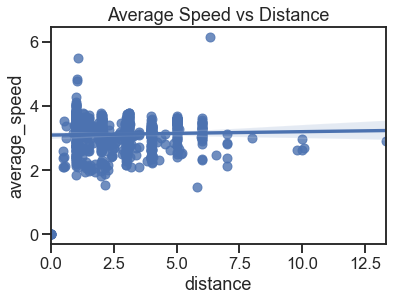

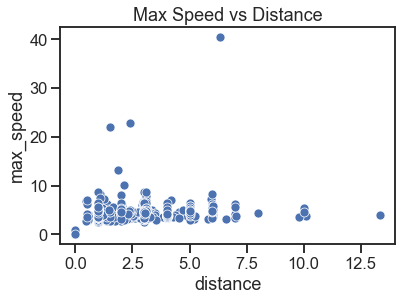

In [13]:
# investigates relationship between speed and distance
speed_vs_distance(df_combo)

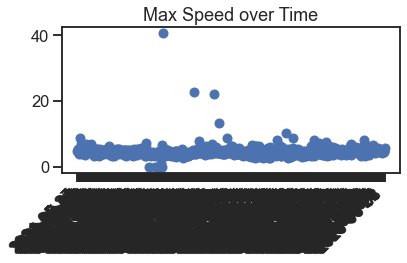

In [14]:
# investigates max speed over time
max_speed_over_time(df_combo)

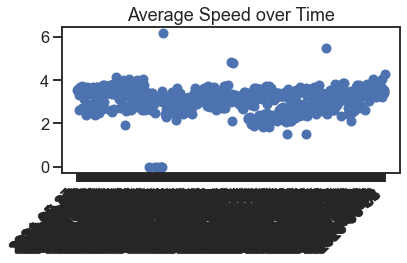

In [15]:
# investigates avg speed over time
avg_speed_over_time(df_combo)

Average T1 Speed: 7.46 | Average T1 Max Speed: 11.09
Average T2 Speed: 7.5 | Average T2 Max Speed: 10.58
Percent increase average speed: 0.54
Percent increase max speed: -4.6


<ipython-input-11-6ce0ba9a3fb1>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run['activity_date'] = pd.to_datetime(run['activity_date']).dt.date
<ipython-input-11-6ce0ba9a3fb1>:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run['time_frame_1'] = np.where( (run['activity_date'] > start_1) & (run['activity_date'] < end_1), 'T', 'F')
<ipython-input-11-6ce0ba9a3fb1>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

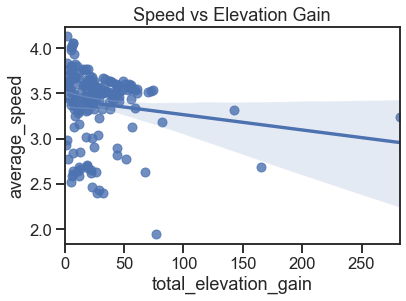

In [16]:
# compares two time frames data
compare_time_frames(df_combo,
                   start_1 = '2019-07-01',
                   end_1 = '2020-04-01', 
                   start_2 = '2020-10-03', 
                   end_2 = '2021-04-26')

In [17]:

# investigating kudo 
kudo_analysis(df_api)

[ 0.22507429  0.65689317 -0.3593275 ]
12.3792031451068
0.2062979051761782
[2902.11953161]
